#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [22]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [23]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [24]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [25]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [26]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [28]:
model = Sequential()

In [29]:
#卷積層1

In [30]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [31]:
model.add(Dropout(rate=0.25))

In [32]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [33]:
#卷積層2與池化層2

In [34]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [35]:
model.add(Dropout(0.25))

In [36]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [37]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [38]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [39]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [40]:
model.add(Dense(10, activation='softmax'))

In [41]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [42]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [43]:
# 設定Loss為Categorical_crossentropy

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [45]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 135s 4ms/step - loss: 2.1438 - accuracy: 0.2127 - val_loss: 2.0259 - val_accuracy: 0.3213
Epoch 2/12
37500/37500 [==============================] - 136s 4ms/step - loss: 1.9198 - accuracy: 0.3151 - val_loss: 1.9211 - val_accuracy: 0.3575
Epoch 3/12
37500/37500 [==============================] - 134s 4ms/step - loss: 1.7822 - accuracy: 0.3733 - val_loss: 1.7884 - val_accuracy: 0.4108
Epoch 4/12
37500/37500 [==============================] - 138s 4ms/step - loss: 1.6880 - accuracy: 0.3978 - val_loss: 1.7044 - val_accuracy: 0.4395
Epoch 5/12
37500/37500 [==============================] - 129s 3ms/step - loss: 1.6131 - accuracy: 0.4219 - val_loss: 1.6334 - val_accuracy: 0.4574
Epoch 6/12
37500/37500 [==============================] - 131s 3ms/step - loss: 1.5479 - accuracy: 0.4452 - val_loss: 1.5877 - val_accuracy: 0.4703
Epoch 7/12
37500/37500 [==============================] - 130s

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

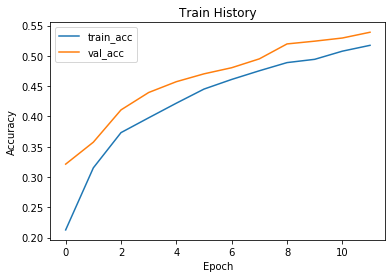

10000/10000 [==============================] - 14s 1ms/step

accuracy= 0.5439000129699707


In [48]:
show_train_history('accuracy','val_accuracy')

scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

In [49]:
# 設定Loss為MSE

In [50]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 150s 4ms/step - loss: 0.0608 - accuracy: 0.5310 - val_loss: 0.0631 - val_accuracy: 0.5414
Epoch 2/12
37500/37500 [==============================] - 139s 4ms/step - loss: 0.0605 - accuracy: 0.5310 - val_loss: 0.0629 - val_accuracy: 0.5419
Epoch 3/12
37500/37500 [==============================] - 136s 4ms/step - loss: 0.0605 - accuracy: 0.5314 - val_loss: 0.0628 - val_accuracy: 0.5452
Epoch 4/12
37500/37500 [==============================] - 141s 4ms/step - loss: 0.0603 - accuracy: 0.5327 - val_loss: 0.0629 - val_accuracy: 0.5448
Epoch 5/12
37500/37500 [==============================] - 139s 4ms/step - loss: 0.0603 - accuracy: 0.5340 - val_loss: 0.0626 - val_accuracy: 0.5470
Epoch 6/12
37500/37500 [==============================] - 136s 4ms/step - loss: 0.0604 - accuracy: 0.5320 - val_loss: 0.0626 - val_accuracy: 0.5481
Epoch 7/12
37500/37500 [==============================] - 145s

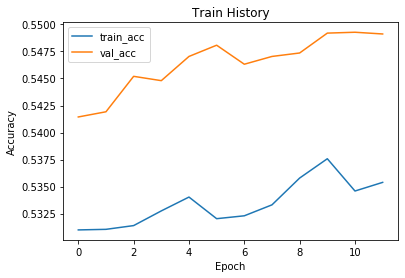

10000/10000 [==============================] - 12s 1ms/step

accuracy= 0.5555999875068665


In [51]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)    
show_train_history('accuracy','val_accuracy')

scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

In [52]:
# 設定Loss為Binary_crossentropy

In [53]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 162s 4ms/step - loss: 0.2035 - accuracy: 0.9203 - val_loss: 0.2127 - val_accuracy: 0.9153
Epoch 2/12
37500/37500 [==============================] - 139s 4ms/step - loss: 0.2030 - accuracy: 0.9205 - val_loss: 0.2124 - val_accuracy: 0.9154
Epoch 3/12
37500/37500 [==============================] - 143s 4ms/step - loss: 0.2026 - accuracy: 0.9205 - val_loss: 0.2116 - val_accuracy: 0.9158
Epoch 4/12
37500/37500 [==============================] - 144s 4ms/step - loss: 0.2016 - accuracy: 0.9211 - val_loss: 0.2110 - val_accuracy: 0.9159
Epoch 5/12
37500/37500 [==============================] - 150s 4ms/step - loss: 0.2014 - accuracy: 0.9212 - val_loss: 0.2108 - val_accuracy: 0.9163
Epoch 6/12
37500/37500 [==============================] - 152s 4ms/step - loss: 0.2016 - accuracy: 0.9211 - val_loss: 0.2106 - val_accuracy: 0.9162
Epoch 7/12
37500/37500 [==============================] - 150s

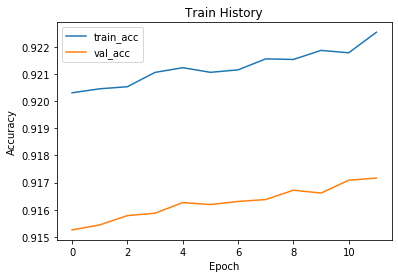

10000/10000 [==============================] - 13s 1ms/step

accuracy= 0.9173700213432312


In [54]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)    
show_train_history('accuracy','val_accuracy')

scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])